
## Summary:
This notebook contains some of the extra visualizations, and secondary processings, of the multulayer.
## <a class="anchor" id="0">Table of content: </a> 


#### [1. Some 3D figures](#1)
#### [2. Simple scale-agnostic stats](#2)
#### [3. Validation for two box sizes](#3)
##### [3.1 Simple velocity mapping](#3.1)
##### [3.2 Cross validation with other methods](#3.2)
#### [4. Validation of Hessian Matrix](#4)
#### [5. Relate to wind condition](#5)

### <a class="anchor" id="1">Some 3D figures</a>

In [ ]:
""" Maybe we want to make some 3D plots """
from matplotlib import cm
case = config2_3.cases[0]
cp = (9.8/case.config.kp)**0.5

fig = plt.figure(figsize=[5,4])
ax = plt.axes(projection='3d')
ax.xaxis._axinfo['label']['space_factor'] = 2.8
x = np.linspace(-case.config.L0/2, case.config.L0/2, 512)
y = np.linspace(-case.config.L0/2, case.config.L0/2, 512)
X, Y = np.meshgrid(x,y)

""" TODO: change to ux coloring """
# my_col = cm.viridis(ux.ravel()/ux.max())

# image = ax.plot_surface(X.ravel(), Y.ravel(), eta.ravel(), facecolor=my_col, linewidth=0, antialiased=False, cmap='viridis')
# image = ax.plot_surface(X.ravel(), Y.ravel(), eta.ravel(), linewidth=0, antialiased=False, cmap='viridis')
# scalar = ux.ravel()/cp
# norm=mpl.colors.SymLogNorm(1,vmin=scalar.min(),vmax=scalar.max())
# colors=plt.cm.coolwarm(norm(scalar))

for t in np.arange(90,100,0.2):
    
    eta = case.read_t('eta', t)
    ux = case.read_t('ux', t)
    ax.clear()
    image = ax.plot_surface(X, Y, eta, cmap='viridis', vmin = -1.5, vmax = 1.5,
                            rstride=2, cstride=2, linewidth=0, antialiased=False)
    ax.set_xlim(-case.config.L0/2, case.config.L0/2)
    ax.set_ylim(-case.config.L0/2, case.config.L0/2)
    ax.set_zlim(-case.config.L0/4, case.config.L0/4)
    # make the panes transparent
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.set_xticks(np.array([-100,0,100]))
    ax.set_yticks(np.array([-100,0,100]))
    ax.set_zticks(np.array([-50,0,50]))

    cb_ax = fig.add_axes([0.22, 0.4, 0.01, 0.3])
    v1 = np.linspace(-1.5, 1.5, 3, endpoint=True)
    cbar = fig.colorbar(image, orientation="vertical", cax=cb_ax, ticks=v1)
    cb_ax.yaxis.set_ticks_position('left')
    cb_ax.yaxis.set_label_position('left')
    cbar.set_label(r'$\eta(m)$', labelpad=0)
    ax.set_xlabel('$x(m)$', labelpad=0); ax.set_ylabel('$y(m)$', labelpad=0); ax.set_zlabel('$z(m)$', labelpad=0)

    fig.savefig('videos/eta_t%g.png' %t, bbox_inches='tight', pad_inches=0.1)


In [ ]:
""" 3D videos """
# How to speed up matplotlib
# https://stackoverflow.com/questions/8955869/why-is-plotting-with-matplotlib-so-slow
from matplotlib import animation
from visualization import contour
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg
import imageio as iio

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):
    fig = plt.figure()
    ax = plt.gca()
    ax.axis('off')
    t = 100
    img = iio.imread("videos/eta_regu_t%g.png" %t)
    image = plt.imshow(img)
    
    # animation function.  This is called sequentially
    def animate(i):
        imgplot = animate_function(i, ax)
        return imgplot

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = False)  
    return anim


# Define the function called at every animation time to read in images
def plot_func(i, ax):
    t = 90 + i*0.2
    img = iio.imread("videos/eta_regu_t%g.png" %t)
    image = plt.imshow(img)
    return image

anim = plot_animation(plot_func, frame_number = 50, interval_time = 100) # Specify frame number
HTML(anim.to_html5_video())

### <a class="anchor" id="2">Visualization</a>
[back](#0)

In [ ]:
""" A visualization of the detection process. Pick a case and a time """ 
# Method 1
case = config3_2.cases[0]
t = 100
eta = case.read_t('eta', t)

a, b = detect_ridges(eta, sigma=1)
delta = case.config.L0/2**case.LEVEL # Normalize the curvature by grid size
b_norm = b/delta**2         
threshold = -3*case.config.kp
b_ = np.logical_not(b_norm > threshold) # Is this value fixed???
a_ = np.zeros(b_.shape) 
for i in range(0,N-1):
    for j in range(1,N-1):
        if (b_[i][j-1] > 0) and (b_[i][j+1] == 0):
            a_[i][j] = 1

# Method 2 
# area = detect_slope(eta_gradx, threshold=-0.3)

""" Some etra filtering to get the edge? """

plot_images(img, b, b_)
# plot_images(eta, eta_gradx, area)

200


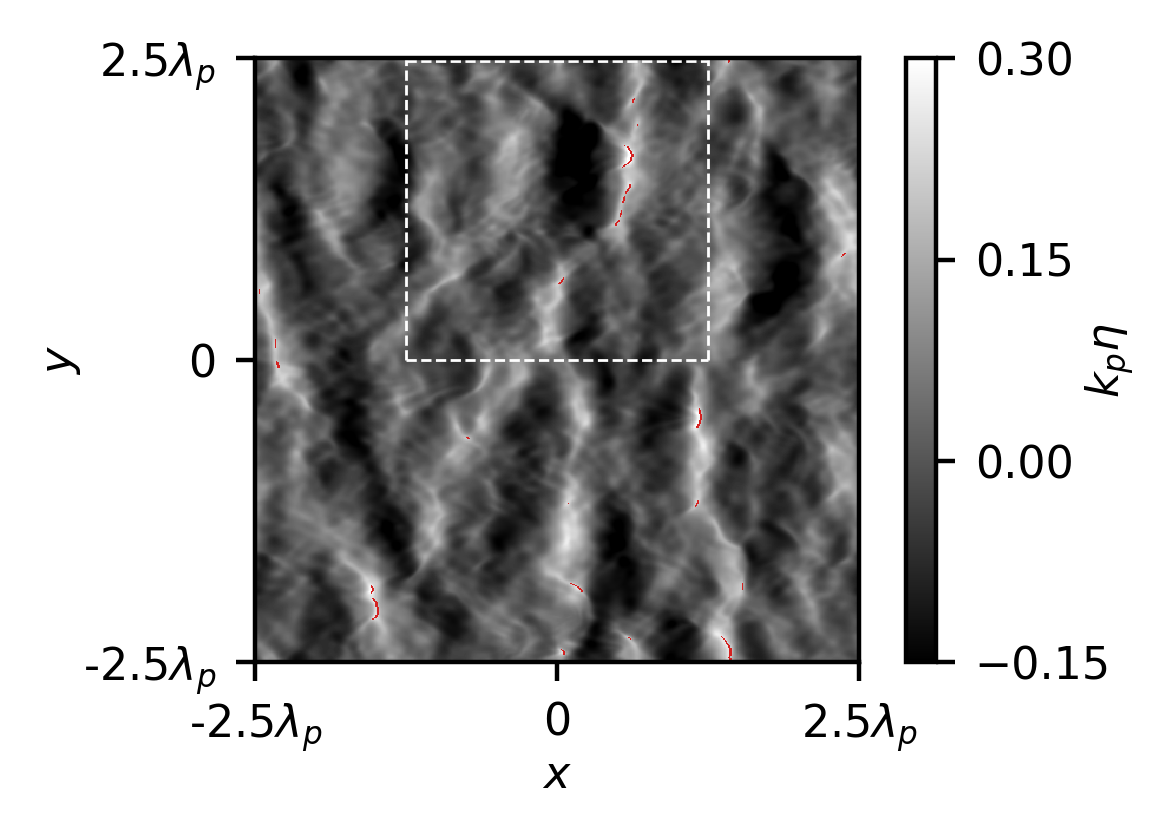

In [125]:
""" A visualization of where the breaking crests are. Reference of the plotting function:
    https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.logic.html
    https://stackoverflow.com/questions/17170229/setting-transparency-based-on-pixel-values-in-matplotlib
"""
fig = plt.figure(figsize=[3,2]); ax = plt.gca()
from matplotlib.ticker import FuncFormatter, MultipleLocator


case = config2_4.cases[0]
print(case.config.L0)
# case = config2_3.cases[0]
# case = config2_6.cases[0]
# case = config1_2.cases[0]

t = 119
threshold = -3*case.config.kp

eta = case.read_t('eta', t)
ux = case.read_t('ux', t)
uy = case.read_t('uy', t)

""" The box """

x_ = np.arange(0,256)/512*case.config.L0
y_ = np.ones(256)*50
ax.plot(y_, x_, '--', c='w', lw=0.5)
y_ = np.ones(256)*(-50)
ax.plot(y_, x_, '--', c='w', lw=0.5)
x_ = np.linspace(-50,50,256)
y_ = np.zeros(256)
ax.plot(x_, y_, '--', c='w', lw=0.5)
y_ = np.ones(256)*99.
ax.plot(x_, y_, '--', c='w', lw=0.5)

my_cmap = plt.cm.Reds
my_cmap.set_under('k', alpha=0)

a, b = detect_ridges(eta, sigma=1.0) # Maxima and minima ridges
delta = case.config.L0/2**case.LEVEL # Normalize the curvature by grid size
b_norm = b/delta**2                
b_ = np.logical_not(b_norm > threshold) # Is this value fixed???
height_filter = np.logical_not(eta < 2.5*np.var(eta)**0.5)
b_ = b_*height_filter
a_ = np.zeros(b_.shape) 
N = 512
for i in range(0,N-1):
    for j in range(1,N-1):
        if (b_[i][j-1] > 0) and (b_[i][j+1] == 0):
            a_[i][j] = 1
            
""" Dim version """

# image = ax.imshow(eta, vmin=-1, vmax=2, cmap='gray', alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
# cbar = plt.colorbar(image)
# image = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
# cbar.set_ticks([-1,0,1,2])
# ax.set_xticks([-case.config.L0/2, case.config.L0/2]); ax.set_yticks([-case.config.L0/2, case.config.L0/2])
# cbar.set_label(r'$\eta(m)$', labelpad=-5)
# ax.set_xlabel('$x(m)$', labelpad=-10)
# ax.set_ylabel('$y(m)$', labelpad=-15)

# fig.savefig('figures/detection_demo_singleplot.pdf', bbox_inches='tight', pad_inches=0)

""" Nondim version """

image = ax.imshow(eta*case.config.kp, vmin=-0.15, vmax=0.3, cmap='gray', alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
cbar = plt.colorbar(image)
image = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])

cbar.set_label(r'$k_p\eta $', labelpad=-5)
cbar.set_ticks([-0.15,0,0.15,0.3])
ax.set_xticks([-case.config.L0/2, case.config.L0/2]); ax.set_yticks([-case.config.L0/2, case.config.L0/2])

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.1f}$\lambda_p$'.format(val/40.) if val !=0 else '0'
))
ax.yaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.1f}$\lambda_p$'.format(val/40.) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=100))
ax.yaxis.set_major_locator(MultipleLocator(base=100))
ax.set_xlabel('$x$', labelpad=0)
ax.set_ylabel('$y$', labelpad=0)

fig.savefig('figures/detection_demo_singleplot_nondim.pdf', bbox_inches='tight', pad_inches=0)

36 320
56 324
76 316
78 318
80 318
82 320
84 318
86 318
88 316
90 314
108 318
110 316
112 316
114 314
118 312
120 312
122 312
130 310
132 310
138 308
140 306
188 260
190 258


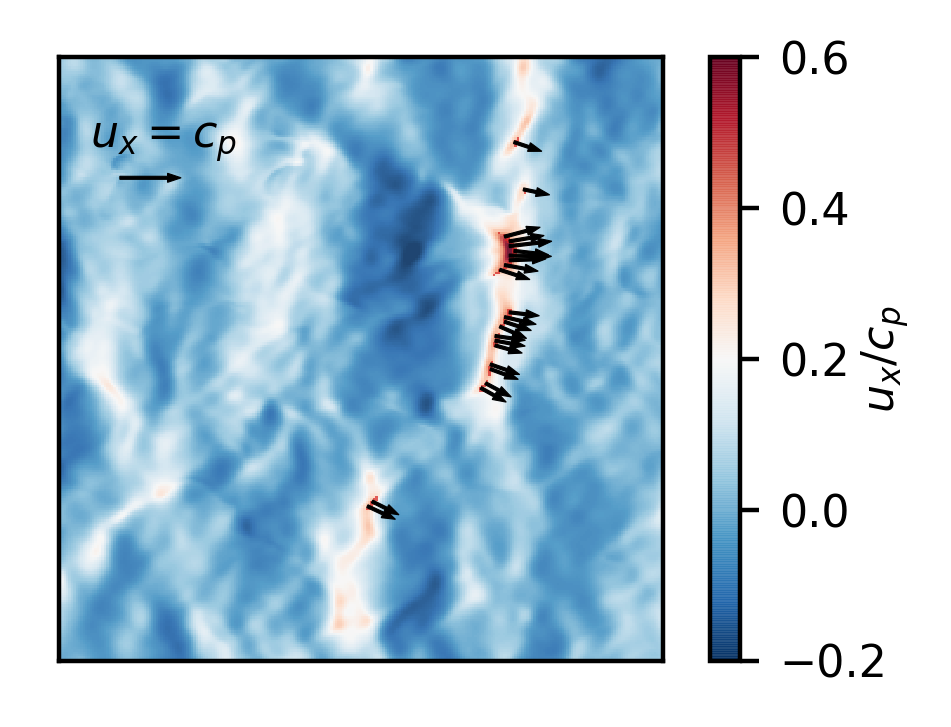

In [56]:
""" With the previous one """
fig = plt.figure(figsize=[3,2]); ax = plt.gca()

x = np.linspace(-case.config.L0/2, case.config.L0/2, 512)
y = np.linspace(-case.config.L0/2, case.config.L0/2, 512)

""" Plot arrows """   
for i in range(0,511):
    for j in range(0,511):
        if (a_[i][j]) == 1:
            if (i%2==0) & (j%2==0) & (j < 400) & (i < 250) & (i > 10):
                print(i,j)
                plt.arrow(x[j], y[511-i], ux[i,j], uy[i,j], width = 0.5, lw=0.2, fc='k')

""" Dimensional """
# image = ax.imshow(ux[:256,127:127+256], vmax=-2, vmin=5, cmap='RdBu_r', alpha=0.9, extent=[-case.config.L0/4,case.config.L0/4,0,case.config.L0/2])
# cbar = plt.colorbar(image)
# image = ax.imshow(a_[:256,127:127+256], cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=0.7, extent=[-case.config.L0/4,case.config.L0/4,0,case.config.L0/2])

# cbar.set_label(r'$u_x(m/s)$', labelpad=-5)
# cbar.set_ticks([-2,0,5])
# ax.set_yticks([0,case.config.L0/2]); ax.set_xticks([-case.config.L0/4,case.config.L0/4])
# ax.set_xlabel('$x(m)$', labelpad=-10)
# ax.set_ylabel('$y(m)$', labelpad=-15)
# # Demonstrate arrow length               
# plt.arrow(-40, 80, 4, 0, width = 0.5, lw=0.2, fc='k')
# plt.text(-45, 85, '$4m/s$', c='k', fontsize=8)
                
# fig.savefig('figures/velocity_demo_singleplot.pdf', bbox_inches='tight', pad_inches=0)

""" Nondim version """
image = ax.imshow(ux[:256,127:127+256]/case.config.cp, vmax=-0.2 , vmin=0.6, cmap='RdBu_r', alpha=0.9, extent=[-case.config.L0/4,case.config.L0/4,0,case.config.L0/2])
cbar = plt.colorbar(image)
image = ax.imshow(a_[:256,127:127+256], cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=0.7, extent=[-case.config.L0/4,case.config.L0/4,0,case.config.L0/2])

cbar.set_label(r'$u_x/c_p$', labelpad=-5)
cbar.set_ticks([-0.2,0,0.2,0.4,0.6])
ax.set_xticks([]); ax.set_yticks([])

# Demonstrate arrow length             
plt.arrow(-40, 80, case.config.cp, 0, width = 0.5, lw=0.2, fc='k')
plt.text(-45, 85, '$u_x = c_p$', c='k', fontsize=8)

fig.savefig('figures/velocity_demo_singleplot_nondim.pdf', bbox_inches='tight', pad_inches=0)

#### A series snapshots

200


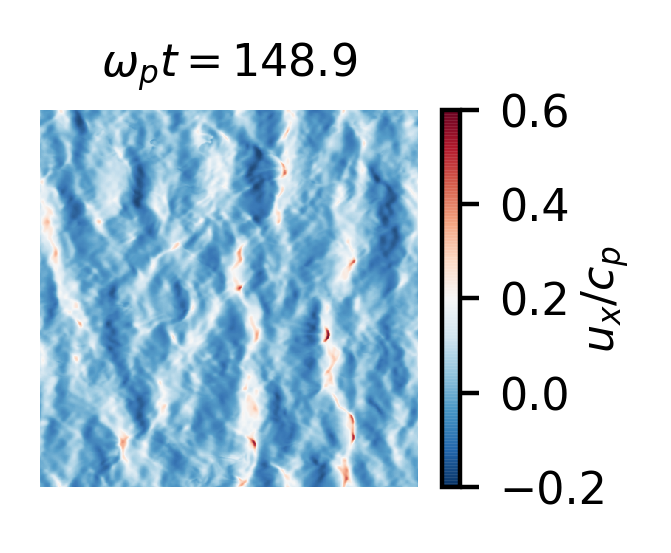

In [67]:
""" A visualization of where the breaking crests are. Reference of the plotting function:
    https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.logic.html
    https://stackoverflow.com/questions/17170229/setting-transparency-based-on-pixel-values-in-matplotlib
"""
fig = plt.figure(figsize=[1.55,1.25]); ax = plt.gca()
from matplotlib.ticker import FuncFormatter, MultipleLocator

case = config2_4.cases[0]
print(case.config.L0)
# case = config2_3.cases[0]
# case = config2_6.cases[0]
# case = config1_2.cases[0]

t = 120
threshold = -3*case.config.kp

eta = case.read_t('eta', t)
ux = case.read_t('ux', t)
uy = case.read_t('uy', t)

my_cmap = plt.cm.Reds
my_cmap.set_under('k', alpha=0)

a, b = detect_ridges(eta, sigma=1.0) # Maxima and minima ridges
delta = case.config.L0/2**case.LEVEL # Normalize the curvature by grid size
b_norm = b/delta**2                
b_ = np.logical_not(b_norm > threshold) # Is this value fixed???
height_filter = np.logical_not(eta < 2.5*np.var(eta)**0.5)
b_ = b_*height_filter
a_ = np.zeros(b_.shape) 
N = 512
for i in range(0,N-1):
    for j in range(1,N-1):
        if (b_[i][j-1] > 0) and (b_[i][j+1] == 0):
            a_[i][j] = 1
            
""" Dim version """

# image = ax.imshow(eta, vmin=-1, vmax=2, cmap='gray', alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
# cbar = plt.colorbar(image)
# image = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
# cbar.set_ticks([-1,0,1,2])
# ax.set_xticks([-case.config.L0/2, case.config.L0/2]); ax.set_yticks([-case.config.L0/2, case.config.L0/2])
# cbar.set_label(r'$\eta(m)$', labelpad=-5)
# ax.set_xlabel('$x(m)$', labelpad=-10)
# ax.set_ylabel('$y(m)$', labelpad=-15)

# fig.savefig('figures/detection_demo_singleplot.pdf', bbox_inches='tight', pad_inches=0)

""" Nondim version """

# image = ax.imshow(eta*case.config.kp, vmin=-0.15, vmax=0.3, cmap='gray', alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
# cbar = plt.colorbar(image)
# image = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])

image = ax.imshow(ux/case.config.cp, vmin=-0.2 , vmax=0.6, cmap='RdBu_r', alpha=0.9, extent=[-case.config.L0/2,case.config.L0/2,0,case.config.L0])
# image = ax.imshow(a_[:256,127:127+256], cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=0.7, extent=[-case.config.L0/4,case.config.L0/4,0,case.config.L0/2])

cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$', labelpad=-5)
cbar.set_ticks([-0.2,0,0.2,0.4,0.6])
ax.set_xticks([]); ax.set_yticks([])

ax.axis('off')

omega = (case.config.kp*9.8)**0.5
ax.set_title('$\omega_p t=%.1f$' %(t*omega), fontsize=8)

fig.savefig('figures_new/snapshot_t120_colorbar.pdf', bbox_inches='tight', pad_inches=0)

#### A video showing the same detection

findfont: Font family ['Open Sans'] not found. Falling back to DejaVu Sans.


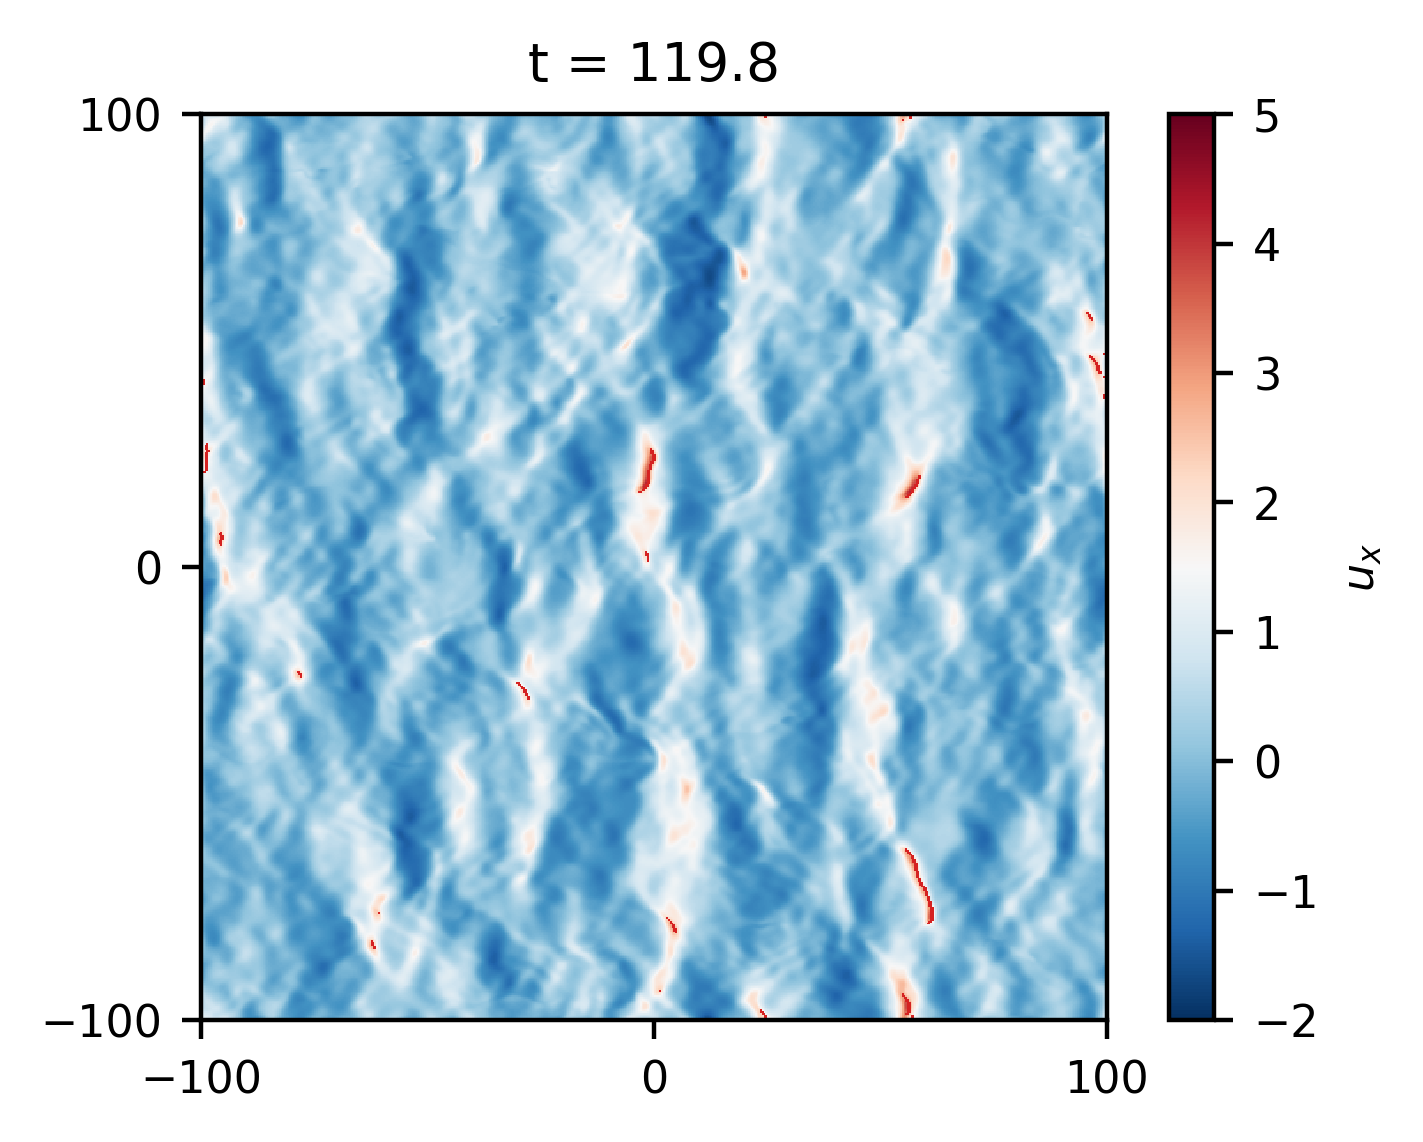

In [57]:
from matplotlib import animation
from visualization import contour
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
import matplotlib.image as mpimg

def identify(eta_gradx, ax):
    crest = np.zeros(np.shape(eta_gradx))
    crest = np.logical_not(eta_gradx > -0.4)
#     crest = np.logical_not(eta_gradx < 0.4)
    my_cmap = plt.cm.Reds
    my_cmap.set_under('k', alpha=0)
    image = ax.imshow(crest, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2], cmap='Reds', interpolation='none', clim=[0.5,1.2])

# Single animation generation function
def plot_animation(animate_function, frame_number = 31, interval_time = 100):

    # First set up the figure, the axis, and the plot element we want to animate   
    global case
    fig = plt.figure(figsize=[4,3]); ax = plt.gca()
    eta = case.read_t('eta', 100)
    ux = case.read_t('ux', 100)
    """ Plotting eta """
#     image = ax.imshow(eta, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2], vmax=2, vmin=-1, cmap='gray', alpha=1)
    """ Plotting ux """
    image = ax.imshow(ux, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2], vmax=5, vmin=-2, cmap='RdBu_r', alpha=1)
    ax.set_xticks([-case.config.L0/2, 0,case.config.L0/2]); ax.set_yticks([-case.config.L0/2, 0, case.config.L0/2])
    cbar = plt.colorbar(image)
#     cbar.set_label(r'$\eta$')
    cbar.set_label(r'$u_x$')

    # animation function.  This is called sequentially
    def animate(i):
        imgplot = animate_function(i, ax)
        return imgplot,

    # call the animator.  blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, frames=frame_number, interval=interval_time, blit = True)  
    return anim


# Define the function called at every animation time to read in images
def plot_func(i, ax):
    global case
    t = 100+i*0.2
    eta = case.read_t('eta', t)
    ux = case.read_t('ux', t)
    ax.clear()
#     image = ax.imshow(eta, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2], vmax=2, vmin=-1, cmap='gray')
    image = ax.imshow(ux, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2], vmax=5, vmin=-2, cmap='RdBu_r', alpha=1)
    ax.set_xticks([-case.config.L0/2, 0, case.config.L0/2]); ax.set_yticks([-case.config.L0/2, 0, case.config.L0/2])
    
    a, b = detect_ridges(eta, sigma=1.0) # Maxima and minima ridges
    delta = case.config.L0/2**case.LEVEL # Normalize the curvature by grid size
    b_norm = b/delta**2                
    b_ = np.logical_not(b_norm > threshold) # Is this value fixed???
    height_filter = np.logical_not(eta < 2.5*np.var(eta)**0.5)
    b_ = b_*height_filter
    a_ = np.zeros(b_.shape) 
    for i in range(0,N-1):
        for j in range(1,N-1):
            if (b_[i][j-1] > 0) and (b_[i][j+1] == 0):
                a_[i][j] = 1

    image = ax.imshow(a_, cmap='Reds', interpolation='none', clim=[0.5,1.2], alpha=1, extent=[-case.config.L0/2,case.config.L0/2,-case.config.L0/2,case.config.L0/2])
           
    ax.set_title('t = %g' %t)
    return image

case = config2_3.cases[0]

anim = plot_animation(plot_func, frame_number = 100, interval_time = 100) # Specify frame number
HTML(anim.to_html5_video())

/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.01_RE40000_9_15_rand2_Htheta0.503/


Text(0, 0.5, '$y$(m)')

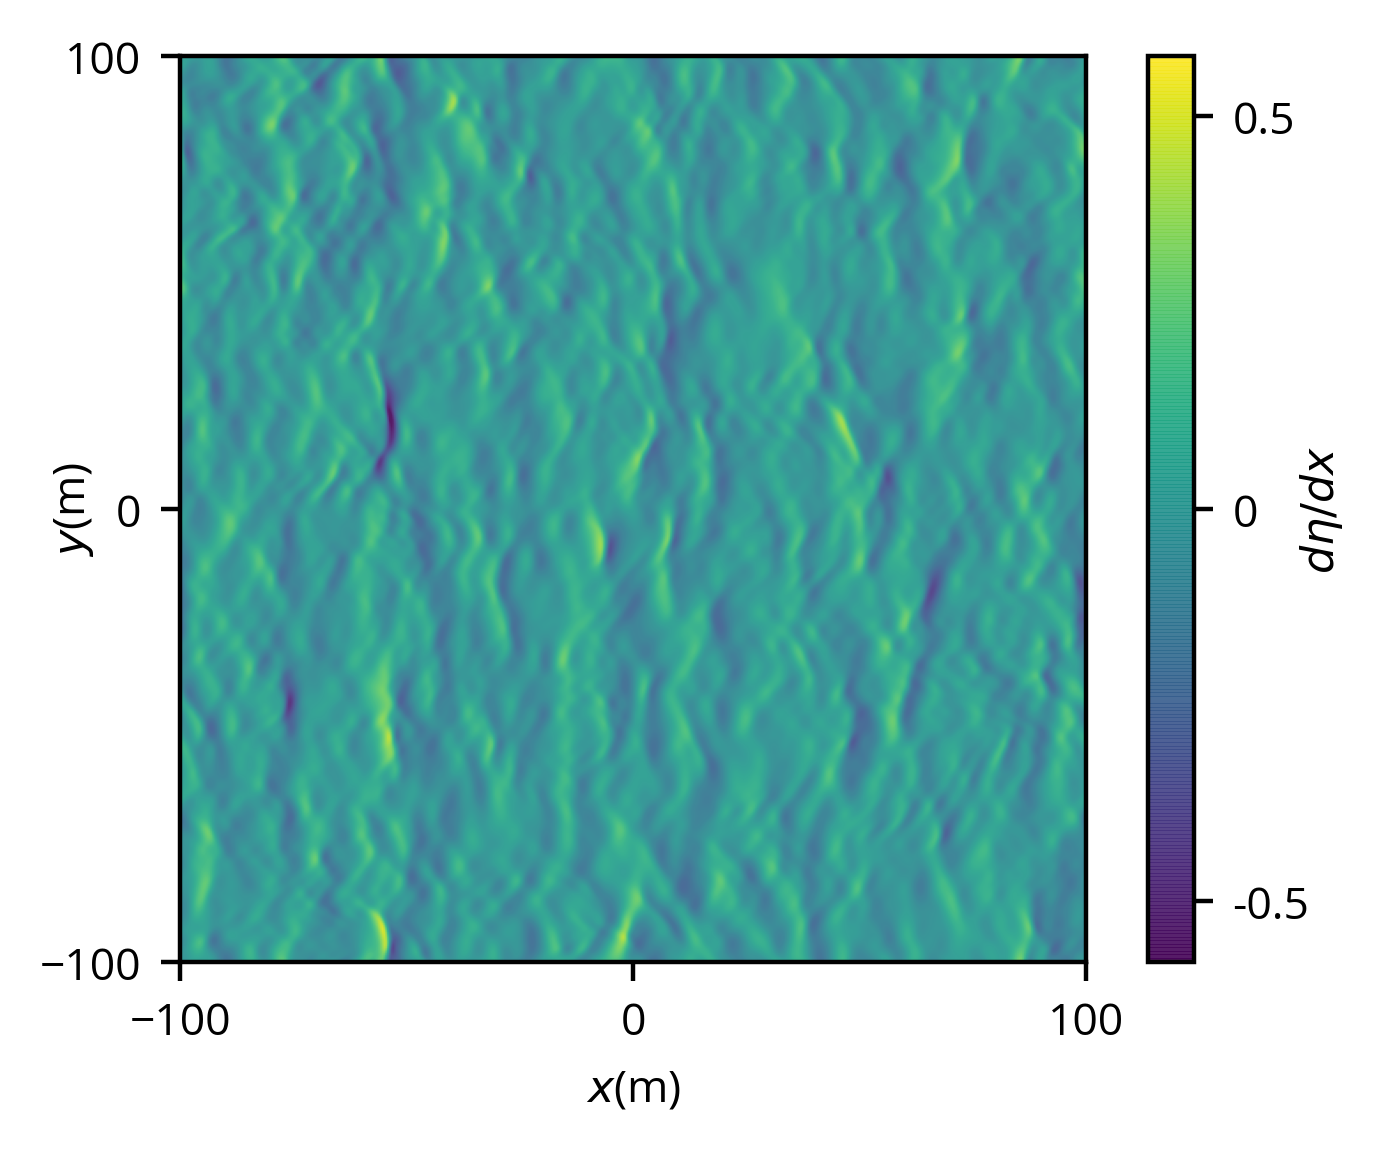

In [41]:
""" Show horizontal slope? """    
fig = plt.figure(figsize=[4,3]); ax = plt.gca()

case = config2_1.cases[0]
print(case.path)
N = 2**case.LEVEL
L = case.config.L0
filepath = case.path + 'surface/'

filename = filepath + 'eta_matrix_%g' %109
eta = np.fromfile(filename, dtype=np.float32)
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
eta_gradx = np.gradient(eta, axis=0)/(L/N)
eta_gradx = np.rot90(eta_gradx)
image = ax.imshow(eta_gradx, extent=[-L/2,L/2,-L/2,L/2], vmax=0.577, vmin=-0.577, cmap='viridis', alpha=0.9)
ax.set_xticks([-L/2,0,L/2]); ax.set_yticks([-L/2,0,L/2])
cbar = plt.colorbar(image)
cbar.set_label(r'$d\eta/dx$', labelpad=-2)
cbar.set_ticks([-0.5,0,0.5])
cbar.set_ticklabels([-0.5,0,0.5])
ax.set_xlabel('$x$(m)')
ax.set_ylabel('$y$(m)', labelpad=-10)
# fig.savefig('figures/detadt_500m.pdf', bbox_inches='tight', pad_inches=0)

### <a class="anchor" id="2">Simple scale-agnostic stats</a>
[back](#0)

In [9]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')

In [39]:


filepath = '/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.03_RE40000_9_15_rand2_Htheta0.503/surface/'

L = 200; N = 2**9
eta_ensem = []
eta_gradx_ensem = []
eta_grady_ensem = []
eta_curvx_ensem = []

for i in range (0,120,10):
    t = i
    filename = filepath + 'eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    eta_ensem.append(eta)
    eta_gradx = np.gradient(eta, axis=0)/(L/N)
    eta_curvx = np.gradient(eta_gradx, axis=0)/(L/N)
    eta_grady = np.gradient(eta, axis=1)/(L/N)
    eta_gradx = np.rot90(eta_gradx)
    eta_grady = np.rot90(eta_grady)
    eta_gradx_ensem.append(eta_gradx)
    eta_grady_ensem.append(eta_grady)
    eta_curvx_ensem.append(eta_curvx)


eta_ensem = np.array(eta_ensem)
eta_gradx_ensem = np.array(eta_gradx_ensem)
eta_grady_ensem = np.array(eta_grady_ensem)
eta_curvx_ensem = np.array(eta_curvx_ensem)

In [65]:
filepath = '/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_9_15_rand2_Htheta0.503/surface/'
filepath = '/projects/DEIKE/jiarongw/multilayer/field_new_50m_P0.02_RE40000_9_15_rand2_Htheta0.503/surface/'

L = 50; N = 2**9
eta_rms_ensem = []
RMSS_ensem = []
eta_skewness_ensem = []
eta_kurtosis_ensem = []

for i in range (0,120):
    t = i
    filename = filepath + 'eta_matrix_%g' %t
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    data = eta.flatten()
    eta_rms = np.var(data)**0.5    
    mean = np.average(data)
    eta_gradx = np.gradient(eta, axis=1)/(L/N)
    RMSS = np.var(eta_gradx)**0.5
    skewness = np.average((data-mean)**3)
    kurtosis = np.average((data-mean)**4)
    eta_rms_ensem.append(eta_rms)
    RMSS_ensem.append(RMSS)
    eta_skewness_ensem.append(skewness)
    eta_kurtosis_ensem.append(kurtosis)

(0, 0.5)

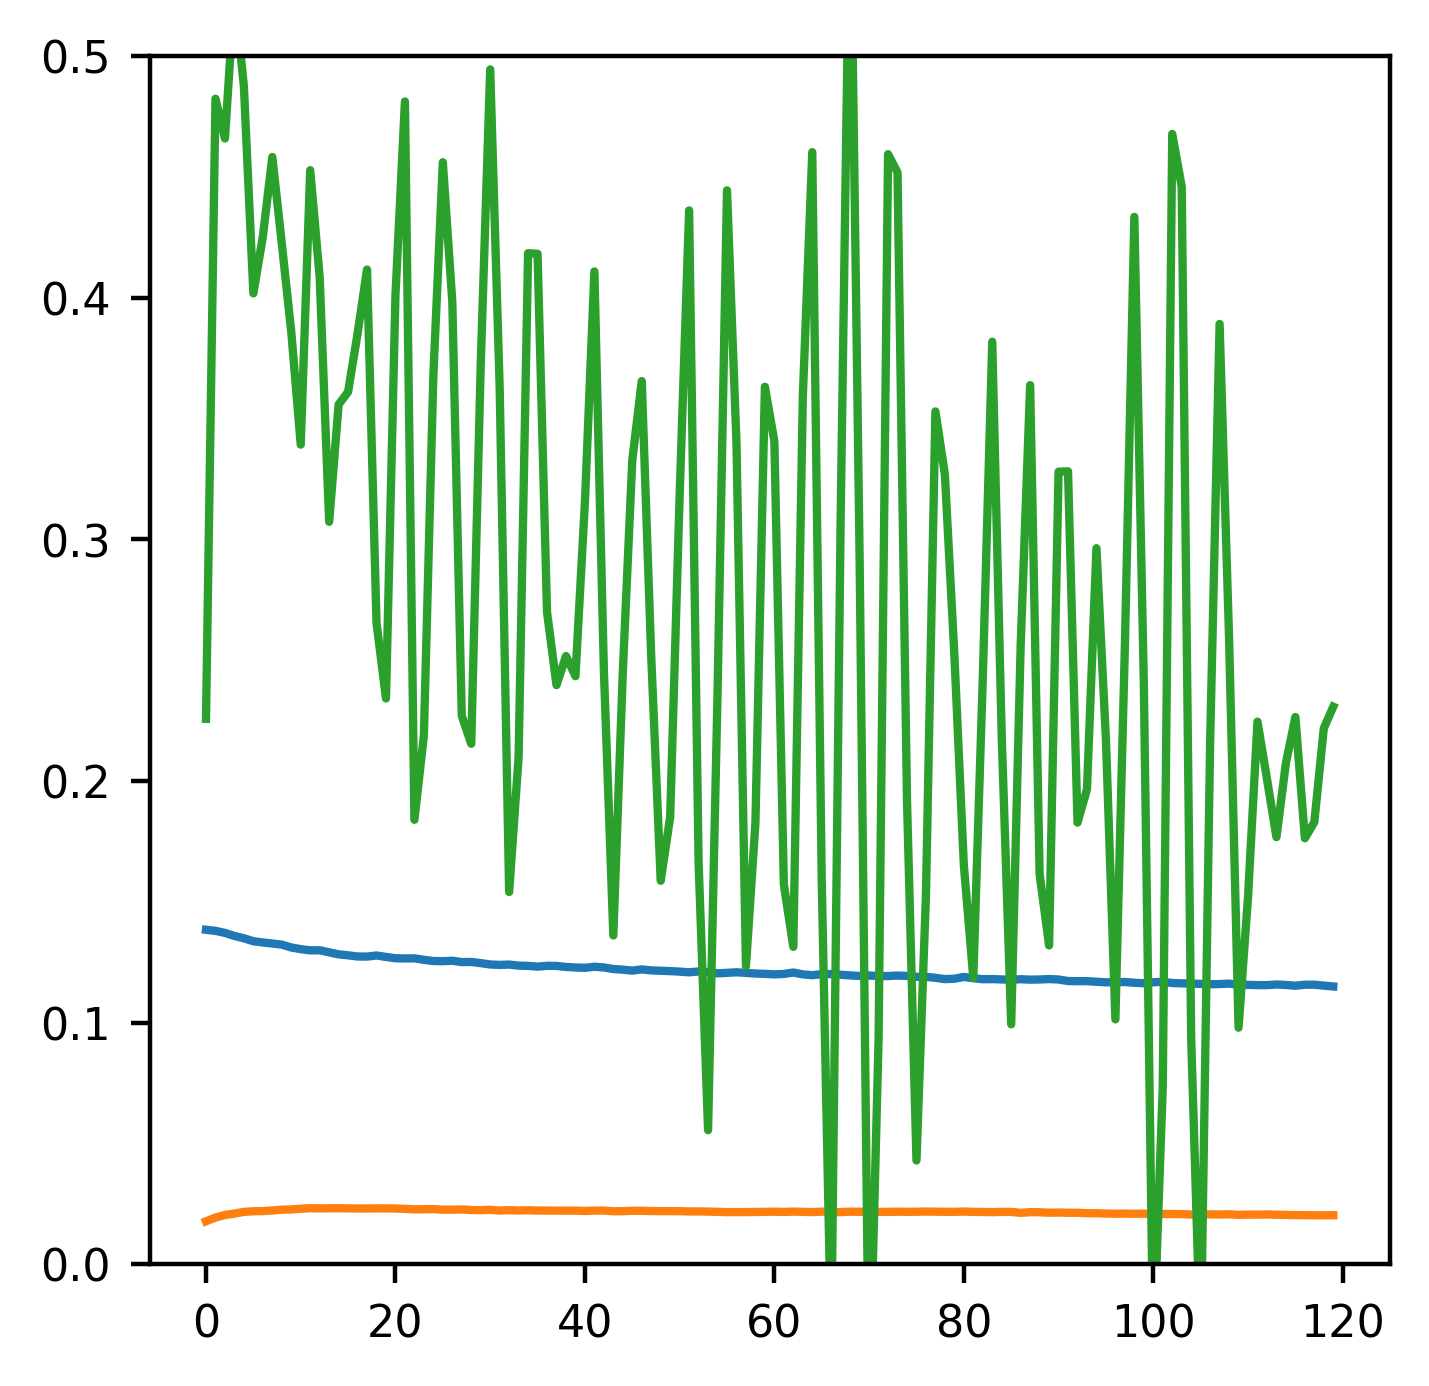

In [66]:
t = np.arange(0,120)
plt.plot(t, eta_rms_ensem)
plt.plot(t, RMSS_ensem)
plt.ylim(0, 0.5)
plt.plot(t, eta_skewness_ensem/(np.array(eta_rms)**3))
plt.ylim(0, 0.5)

In [ ]:
t = np.arange(0,120)
plt.plot(t, eta_kurtosis_ensem/(np.array(eta_rms)**4)-3)
plt.ylim(-0.5, 1.2)

0.07529999236954232 0.16003486638972972 0.12926732315611192 -0.21296968877563716
0.07292743247107593 0.15647641704967194 0.2250542488328481 -0.11923253980062665
0.07131027707562879 0.14306854142298014 0.34263364140240654 -0.07993851711908029
0.06994974206116336 0.1374529741890676 0.39623844819137477 0.3490367251551003
0.06920322780612868 0.13054731510483109 0.29590857972719503 0.03838493476929772
0.06851450264804633 0.12728917321443997 0.2845326661138701 -0.07509550397593623
0.005899747212727864


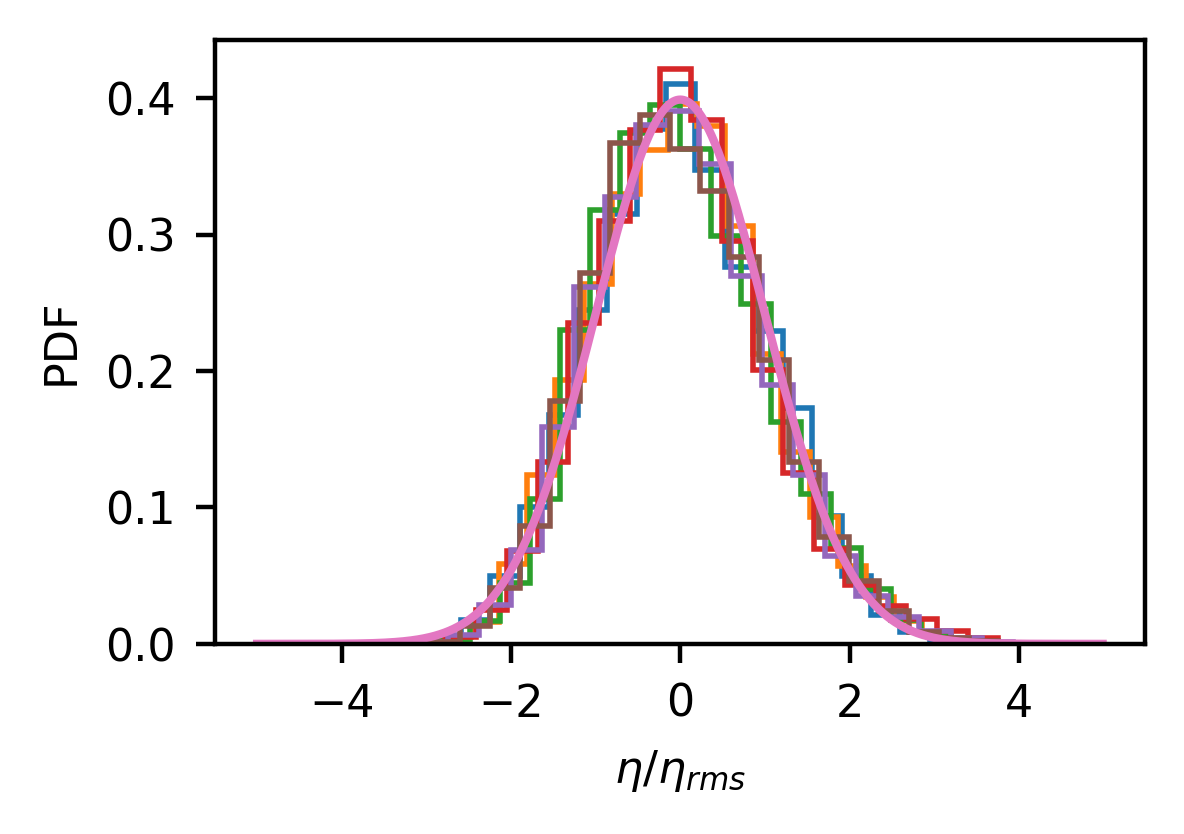

In [40]:
""" Distribution of surface elevation """
s0 = 0.4
kp = 2*np.pi/L*5
# print(np.count_nonzero(eta_ensem > 0.4/kp))
# print(np.count_nonzero(eta_gradx_ensem > 0.4/kp))
# np.histogram(eta_ensem.flatten(), bins=10)

fig = plt.figure(figsize=[3,2])

# data = eta_ensem.flatten()
for i in range (0,12,2):
    data = eta_ensem[i].flatten()
    eta_rms = np.var(data)**0.5
    mean = np.average(data)
    RMSS = np.var(eta_gradx_ensem[i])**0.5
    skewness = np.average((data-mean)**3)
    kurtosis = np.average((data-mean)**4)
    print(eta_rms*kp, RMSS, skewness/eta_rms**3, kurtosis/eta_rms**4-3)
    n,bins,_ = plt.hist(data/eta_rms, bins=20, density=True, histtype=u'step')
    
x_ = np.arange(-5,5,0.01)
p_ = 1/(2*np.pi)**0.5*np.exp(-(x_)**2/2)
plt.plot(x_,p_)
plt.xlabel(r'$\eta/\eta_{rms}$'); plt.ylabel('PDF')

""" Order of magnitude estimation of L (length/area)"""
print(np.count_nonzero(eta_gradx_ensem > 0.4)/len(eta_gradx_ensem.flatten()))

0.16003486638972972
0.15647641704967194
0.14306854142298014
0.1374529741890676
0.13054731510483109
0.12728917321443997


Text(0, 0.5, 'PDF')

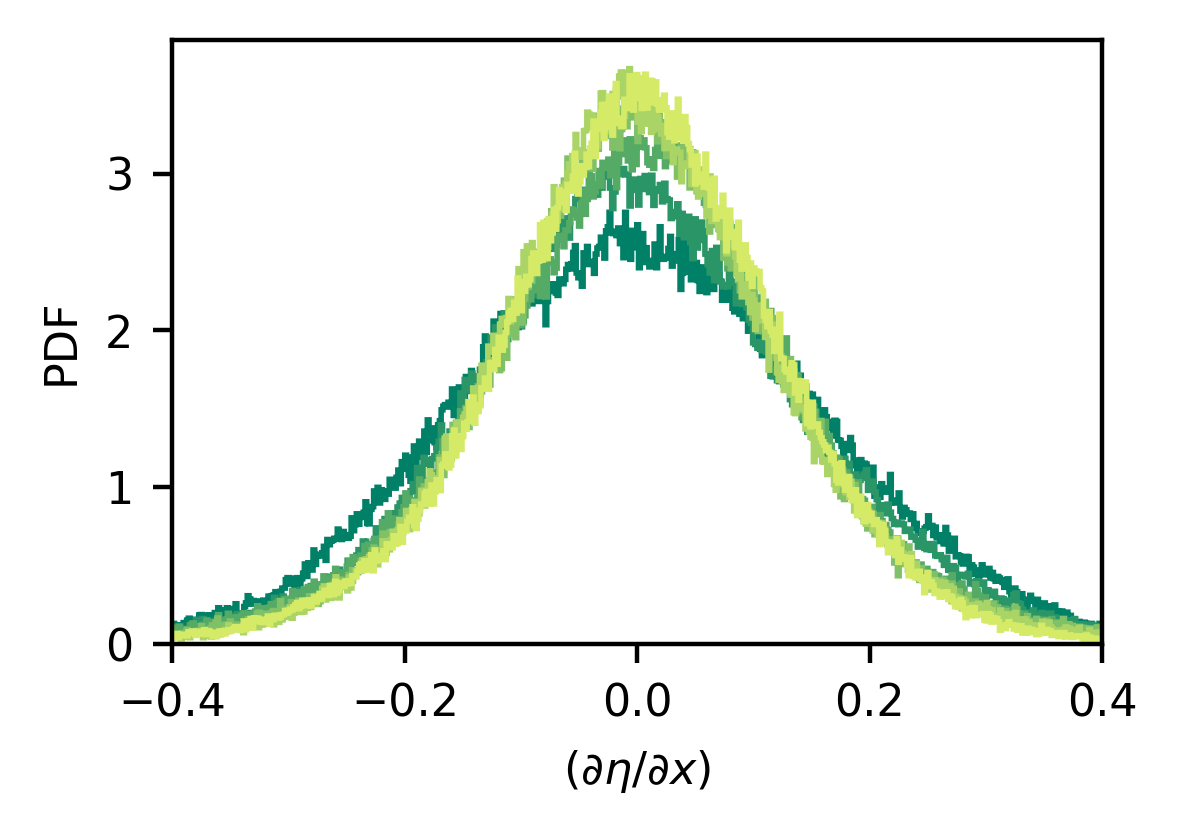

In [44]:
""" Distribution of slope """
fig = plt.figure(figsize=[3,2])
for i in range(0,12,2):
    data = eta_curvx_ensem[i].flatten()
    data = eta_gradx_ensem[i].flatten()
    slope_rms = np.var(data)**0.5
    print(slope_rms)
    n,bins,_ = plt.hist(data, bins=1000, density=True, histtype=u'step', color=plt.get_cmap('summer')(i/12))
# x_ = np.arange(-5,5,0.01)
# p_ = 1/(2*np.pi)**0.5*np.exp(-(x_/slope_rms)**2/2)/slope_rms
# plt.plot(x_,p_)

# plt.xlim([-0.8,0.8])
plt.xlim([-0.4,0.4])
plt.xlabel(r'$(\partial{\eta} / \partial{x})$'); plt.ylabel('PDF')

In [ ]:
""" Distribution of surface elevation for two kp.
    What distribution is this?? Gaussian? Rayleigh? """
s0 = 0.4
kp = 2*np.pi/L*5
# print(np.count_nonzero(eta_ensem > 0.4/kp))
# print(np.count_nonzero(eta_gradx_ensem > 0.4/kp))
# np.histogram(eta_ensem.flatten(), bins=10)

fig = plt.figure(figsize=[3,2])

case = config3_2.cases[0]
eta = case.read_t(fieldname='eta', t=100)
data = eta.flatten(); eta_rms = np.var(data)**0.5
print('Hs*kp = %g' %(4*eta_rms*case.config.kp))
print(case.config.kp)
n,bins,_ = plt.hist(data/eta_rms, bins=20, density=True, alpha=0.5, color='C0')
x_ = np.arange(-5,5,0.01)
p_ = 1/(2*np.pi)**0.5*np.exp(-(x_)**2/2)
plt.plot(x_,p_,c='C0')

case = config2_3.cases[0]
eta = case.read_t(fieldname='eta', t=100)
data = eta.flatten(); eta_rms = np.var(data)**0.5
print('Hs*kp = %g' %(4*eta_rms*case.config.kp))
print(case.config.kp)
n,bins,_ = plt.hist(data/eta_rms, bins=20, density=True, alpha=0.5, color='C1')
x_ = np.arange(-5,5,0.01)
p_ = 1/(2*np.pi)**0.5*np.exp(-(x_)**2/2)
plt.plot(x_,p_,c='C1',alpha=1)

plt.xlabel(r'$\eta/\eta_{rms}$'); plt.ylabel('PDF')

""" Order of magnitude estimation of L (length/area)"""
# print(np.count_nonzero(eta_gradx_ensem > 0.4)/len(eta_gradx_ensem.flatten()))

### <a class="anchor" id="3">Validation for two box sizes</a>
[back](#0)

In [ ]:
""" Distribution of surface elevation """
s0 = 0.4
kp = 2*np.pi/L*5
# print(np.count_nonzero(eta_ensem > 0.4/kp))
# print(np.count_nonzero(eta_gradx_ensem > 0.4/kp))
# np.histogram(eta_ensem.flatten(), bins=10)

fig = plt.figure(figsize=[3,2])

case = config3_2.cases[0]
eta = case.read_t(fieldname='eta', t=100)
data = eta.flatten(); eta_rms = np.var(data)**0.5
print('Hs*kp = %g' %(4*eta_rms*case.config.kp))
print(case.config.kp)
n,bins,_ = plt.hist(data/eta_rms, bins=20, density=True, alpha=0.5, color='C0')
x_ = np.arange(-5,5,0.01)
p_ = 1/(2*np.pi)**0.5*np.exp(-(x_)**2/2)
plt.plot(x_,p_,c='C0')

case = config2_3.cases[0]
eta = case.read_t(fieldname='eta', t=100)
data = eta.flatten(); eta_rms = np.var(data)**0.5
print('Hs*kp = %g' %(4*eta_rms*case.config.kp))
print(case.config.kp)
n,bins,_ = plt.hist(data/eta_rms, bins=20, density=True, alpha=0.5, color='C1')
x_ = np.arange(-5,5,0.01)
p_ = 1/(2*np.pi)**0.5*np.exp(-(x_)**2/2)
plt.plot(x_,p_,c='C1',alpha=1)

plt.xlabel(r'$\eta/\eta_{rms}$'); plt.ylabel('PDF')

""" Order of magnitude estimation of L (length/area)"""
# print(np.count_nonzero(eta_gradx_ensem > 0.4)/len(eta_gradx_ensem.flatten()))

### <a class="anchor" id="4">Validation I did for the Hessian ridge detection</a>
[back](#0)

In [10]:
from skimage.filters import gaussian
from skimage.util import img_as_float
from itertools import combinations_with_replacement

def detect_ridges(gray, sigma=1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def hessian_matrix_test(image, sigma=1, mode='constant', cval=0, order='rc'):
    """Compute the Hessian matrix.

    In 2D, the Hessian matrix is defined as::

        H = [Hrr Hrc]
            [Hrc Hcc]

    which is computed by convolving the image with the second derivatives
    of the Gaussian kernel in the respective r- and c-directions.

    The implementation here also supports n-dimensional data.

    Parameters
    ----------
    image : ndarray
        Input image.
    sigma : float
        Standard deviation used for the Gaussian kernel, which is used as
        weighting function for the auto-correlation matrix.
    mode : {'constant', 'reflect', 'wrap', 'nearest', 'mirror'}, optional
        How to handle values outside the image borders.
    cval : float, optional
        Used in conjunction with mode 'constant', the value outside
        the image boundaries.
    order : {'rc', 'xy'}, optional
        This parameter allows for the use of reverse or forward order of
        the image axes in gradient computation. 'rc' indicates the use of
        the first axis initially (Hrr, Hrc, Hcc), whilst 'xy' indicates the
        usage of the last axis initially (Hxx, Hxy, Hyy)

    Returns
    -------
    H_elems : list of ndarray
        Upper-diagonal elements of the hessian matrix for each pixel in the
        input image. In 2D, this will be a three element list containing [Hrr,
        Hrc, Hcc]. In nD, the list will contain ``(n**2 + n) / 2`` arrays.

    Examples
    --------
    >>> from skimage.feature import hessian_matrix
    >>> square = np.zeros((5, 5))
    >>> square[2, 2] = 4
    >>> Hrr, Hrc, Hcc = hessian_matrix(square, sigma=0.1, order='rc')
    >>> Hrc
    array([[ 0.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0., -1.,  0.],
           [ 0.,  0.,  0.,  0.,  0.],
           [ 0., -1.,  0.,  1.,  0.],
           [ 0.,  0.,  0.,  0.,  0.]])
    """


    image = img_as_float(image)

    gaussian_filtered = gaussian(image, sigma=sigma, mode=mode, cval=cval)
    gaussian_filtered = image

    
    gradients = np.gradient(gaussian_filtered)
    axes = range(image.ndim)


    if order == 'rc':
        axes = reversed(axes)


    H_elems = [np.gradient(gradients[ax0], axis=ax1)
               for ax0, ax1 in combinations_with_replacement(axes, 2)]
    return (gaussian_filtered, gradients, H_elems)

In [11]:
case = config3_2.cases[0]
case = config2_3.cases[0]
# case = config2_6.cases[0]
case = config1_2.cases[0]
N = 2**case.LEVEL
L = case.config.L0
filepath = case.path + 'surface/'
filename = filepath + 'eta_matrix_%g' %90
eta = np.fromfile(filename, dtype=np.float32)
eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
eta = np.rot90(eta)
gaussian_filtered, gradients, H_elems = hessian_matrix_test(eta, sigma=1, order='rc')
maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)

0.09765625
-0.20179993
-1.2566370614359172
0.026958914


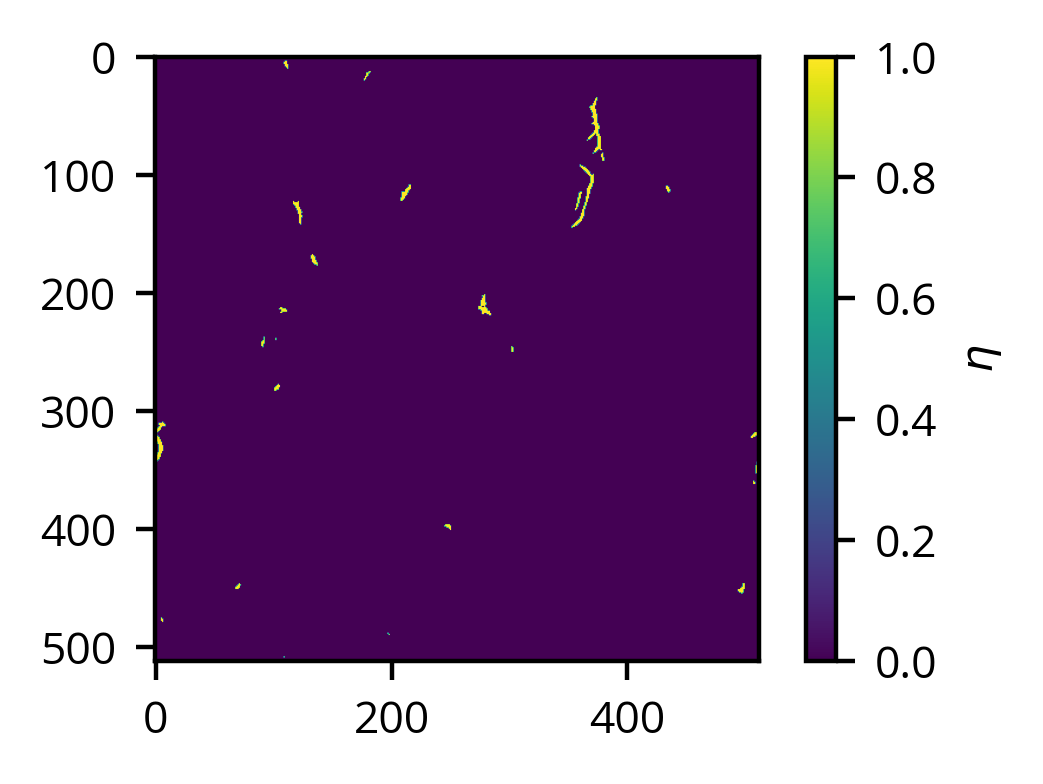

In [12]:
plt.figure(figsize=[3,2]); ax = plt.gca()
b1 = np.logical_not(eta < 2.5*np.var(eta)**0.5) # We can kind of use something between 2.5-3\sigma
delta = case.config.L0/2**case.LEVEL
print(delta)
minima_ridges_norm = minima_ridges/delta**2
print(np.average(minima_ridges_norm))
threshold = -2*case.config.kp # kp = 2pi/10
# threshold = -2*case.config.kp # kp = 2pi/40
# threshold = -2*case.config.kp # kp = 2pi/100
# threshold = -0.3 # kp = 2pi/100
print(threshold)
b2 = np.logical_not(minima_ridges_norm > threshold)
image = plt.imshow(b2*b1)
# image = plt.imshow(minima_ridges_norm)
cbar = plt.colorbar(image)
print(H_elems[0].max())
cbar.set_label(r'$\eta$')

In [ ]:
fig = plt.figure(figsize=[512/400,512/400]); ax = plt.gca()
plt.imshow(b_, cmap='gray', extent=[0,512,0,512], aspect=1)

# axes([0.08, 0.08, 0.94-0.08, 0.94-0.08]) #[left, bottom, width, height]
# axis('scaled')
ax.axis('off')
fig.savefig('frame1.png',bbox_inches='tight',pad_inches=0)

In [ ]:
fig = plt.figure(figsize=[3,3]); ax= plt.gca()
plt.imshow(b_400, alpha=0.5, cmap='gray')
plt.imshow(b_401, alpha=0.5, cmap='gray')
c = 1 # velocity 1m/s
delta = c*0.1/L*N
x = np.arange(10,10+delta,0.1); y = np.ones(len(x))*10
plt.plot(x,y,'r',lw=0.5)
c = 10 # velocity 1m/s
delta = c*0.1/L*N
x = np.arange(10,10+delta,0.1); y = np.ones(len(x))*20
plt.plot(x,y,'r',lw=0.5)
plt.plot(425, 250, '.', c='r')
ax.axis('off')
cp = (9.8/kp)**0.5
print('Peak wave phase speed: %g' %cp)

In [ ]:
a = np.zeros(b_400.shape)
for i in range(0,2**N-1):
    for j in range(1,2**N-2):
        if (b_400[i][j-1] > 0) and (b_400[i][j+1] == 0):
            a[i][j] = 1
ux_a = ux*a
hist = np.histogram(ux_a, bins=(0.0001,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6))